## IMPORTING LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
import plotly.express as px
#import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv("/content/Regression_StoreSales.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EXPLORATORY DATA ANALYSIS

In [ ]:
df.shape

(14204, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

In [ ]:
df_copy = df.copy()

In [ ]:
df1 = px.data.tips()
fig = px.pie(df_copy,values='Item_Outlet_Sales',names='Item_Fat_Content',hole=0.5)
fig.show()

In [ ]:
df_copy.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
df_copy.drop(df_copy[df_copy.Item_Outlet_Sales.isnull()].index,axis=0,inplace=True)

In [ ]:
df_copy['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df1 =df_copy[df_copy['Outlet_Size']=='Medium'].loc[:,["Item_Outlet_Sales"]]
df1 = df1.to_numpy()

In [ ]:
df2 = df_copy[df_copy['Outlet_Size']=='Small'].loc[:,["Item_Outlet_Sales"]]


In [ ]:
df2 = df2.to_numpy()

In [ ]:
df3 = df_copy[df_copy['Outlet_Size']=='High'].loc[:,["Item_Outlet_Sales"]]
df3 = df3.to_numpy()

In [ ]:
df_1=pd.DataFrame(df1,columns=['Medium'])
df_2 = pd.DataFrame(df2,columns=['Small'])
df_3 = pd.DataFrame(df3,columns=['High'])

In [ ]:
df_all = pd.concat([df_1,df_2,df_3],axis=1)

In [ ]:
df_all = df_all.dropna()

In [ ]:
df_all

,Medium,Small,High
0,3735.1380,1076.5986,994.7052
1,443.4228,4710.5350,343.5528
2,2097.2700,2187.1530,1977.4260
3,732.3800,2145.2076,3775.0860
4,556.6088,1547.3192,308.9312
...,...,...,...
927,4274.4360,1404.8380,1494.0552
928,555.2772,2812.3392,673.7896
929,188.4214,5191.2426,2324.9736
930,2332.2974,245.0144,2479.4392


In [ ]:
x = df_all.iloc[:,0]
y =  df_all.iloc[:,1]
z =  df_all.iloc[:,2]

In [ ]:
fig = px.scatter_3d(x = x,y= y,z= z,color=df_all['Small'],color_discrete_sequence=['green','magenta'])
fig.show()

In [ ]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_copy['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

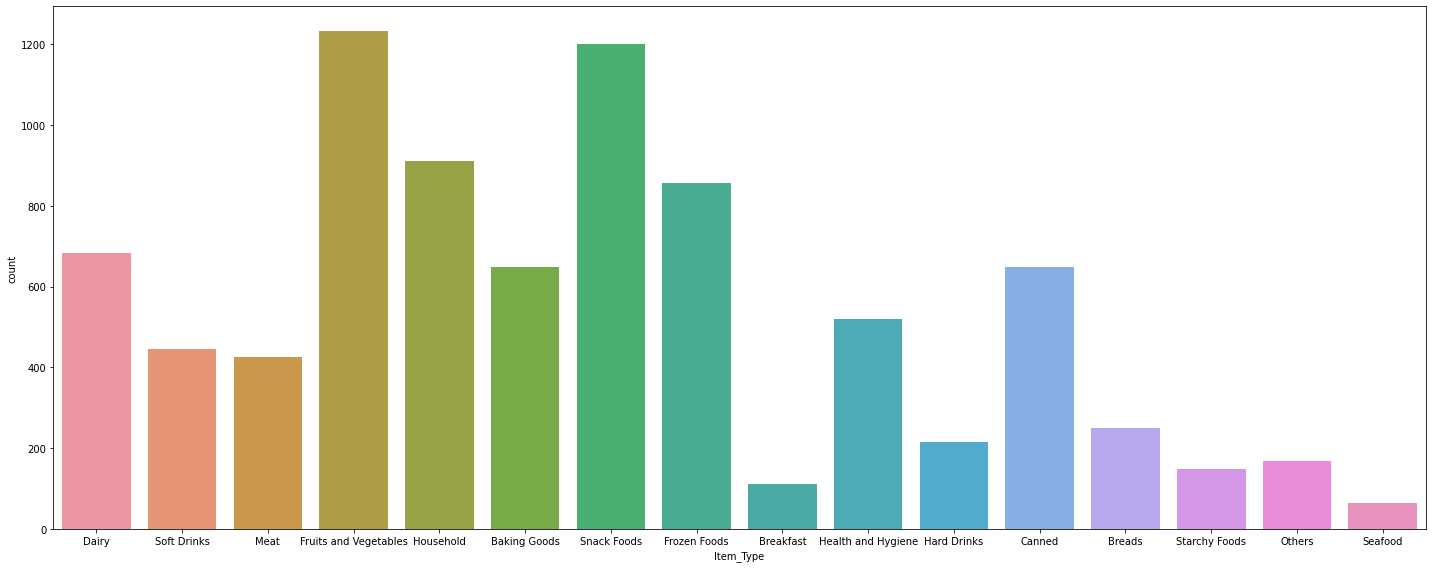

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df_copy['Item_Type'])
plt.tight_layout()

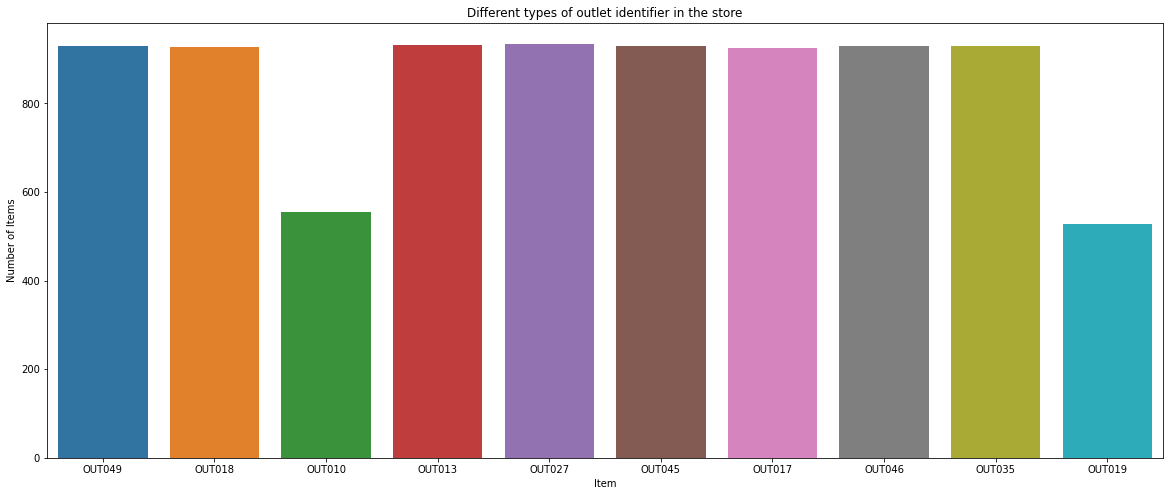

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df_copy['Outlet_Identifier'])
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()
     


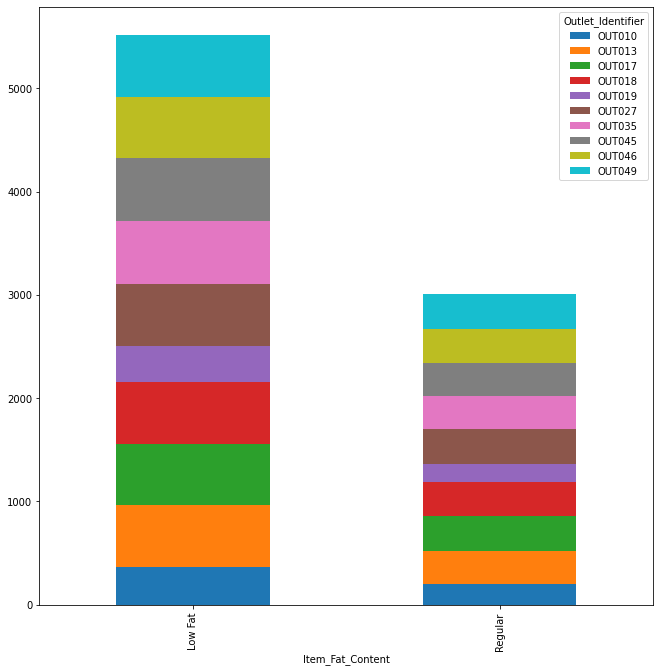

In [ ]:
Item_Fat = pd.crosstab(df_copy['Item_Fat_Content'],df_copy['Outlet_Identifier'])
Item_Fat.plot(kind="bar", stacked=True, figsize=(11, 11))
plt.show()

In [ ]:
#pip install sweetviz

## SWEETVIZ LIBRARY

In [ ]:
#import sweetviz as sv
#sweet_report = sv.analyze(df_copy)

In [ ]:
#sweet_report.show_html("mini_project2.html")

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


KLIB_LIBRARY

In [ ]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 5.9 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


GridSpec(6, 7)

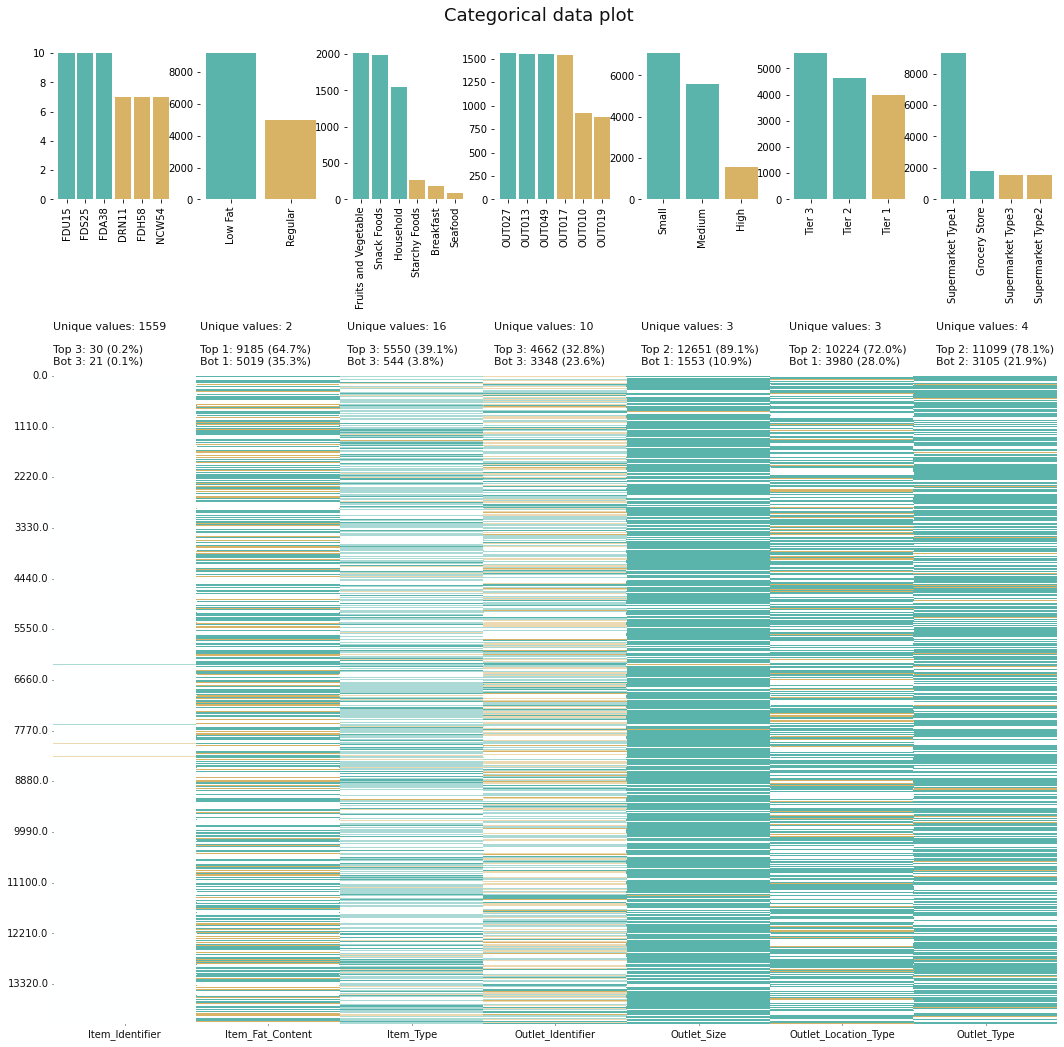

In [ ]:
import klib
klib.cat_plot(df)

In [ ]:
klib.data_cleaning(df)

Shape of cleaned data: (14204, 12) - Remaining NAs: 5681


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.86 MB (-66.15%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,FDX07,19.200001,Regular,0.074402,Fruits and Vegetables,182.095001,OUT010,1998,Medium,Tier 3,Grocery Store,732.380005
4,NCD19,8.930000,Low Fat,0.064299,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,Regular,0.013496,Snack Foods,141.315399,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.144806,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.744003,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300000,Regular,0.064709,Canned,214.621796,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [ ]:
df = klib.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  string  
 1   Item_Weight                14204 non-null  float32 
 2   Item_Fat_Content           14204 non-null  category
 3   Item_Visibility            14204 non-null  float32 
 4   Item_Type                  14204 non-null  category
 5   Item_MRP                   14204 non-null  float32 
 6   Outlet_Identifier          14204 non-null  category
 7   Outlet_Establishment_Year  14204 non-null  int16   
 8   Outlet_Size                14204 non-null  category
 9   Outlet_Location_Type       14204 non-null  category
 10  Outlet_Type                14204 non-null  category
 11  Item_Outlet_Sales          8523 non-null   float32 
dtypes: category(6), float32(4), int16(1), string(1)
memory usage: 445.6 KB


In [ ]:
df.drop(df[df.Item_Outlet_Sales.isnull()].index,axis=0,inplace=True)

In [ ]:
#df['Item_Identifier'].apply(lambda x:x[0:3])


In [ ]:
# df['Item_type_values'] = df['Item_Identifier'].apply(lambda x:x[0:3])

In [ ]:
df = df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [ ]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cols:
  df[i] = le.fit_transform(df[i])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.074402,6,182.095001,1998,1,2,0,732.380005
4,8.930000,0,0.064299,9,53.861401,1987,0,2,1,994.705200


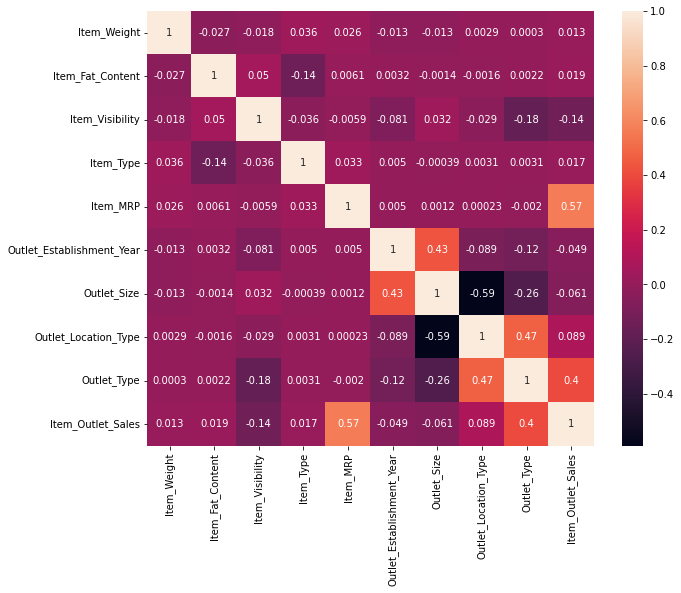

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

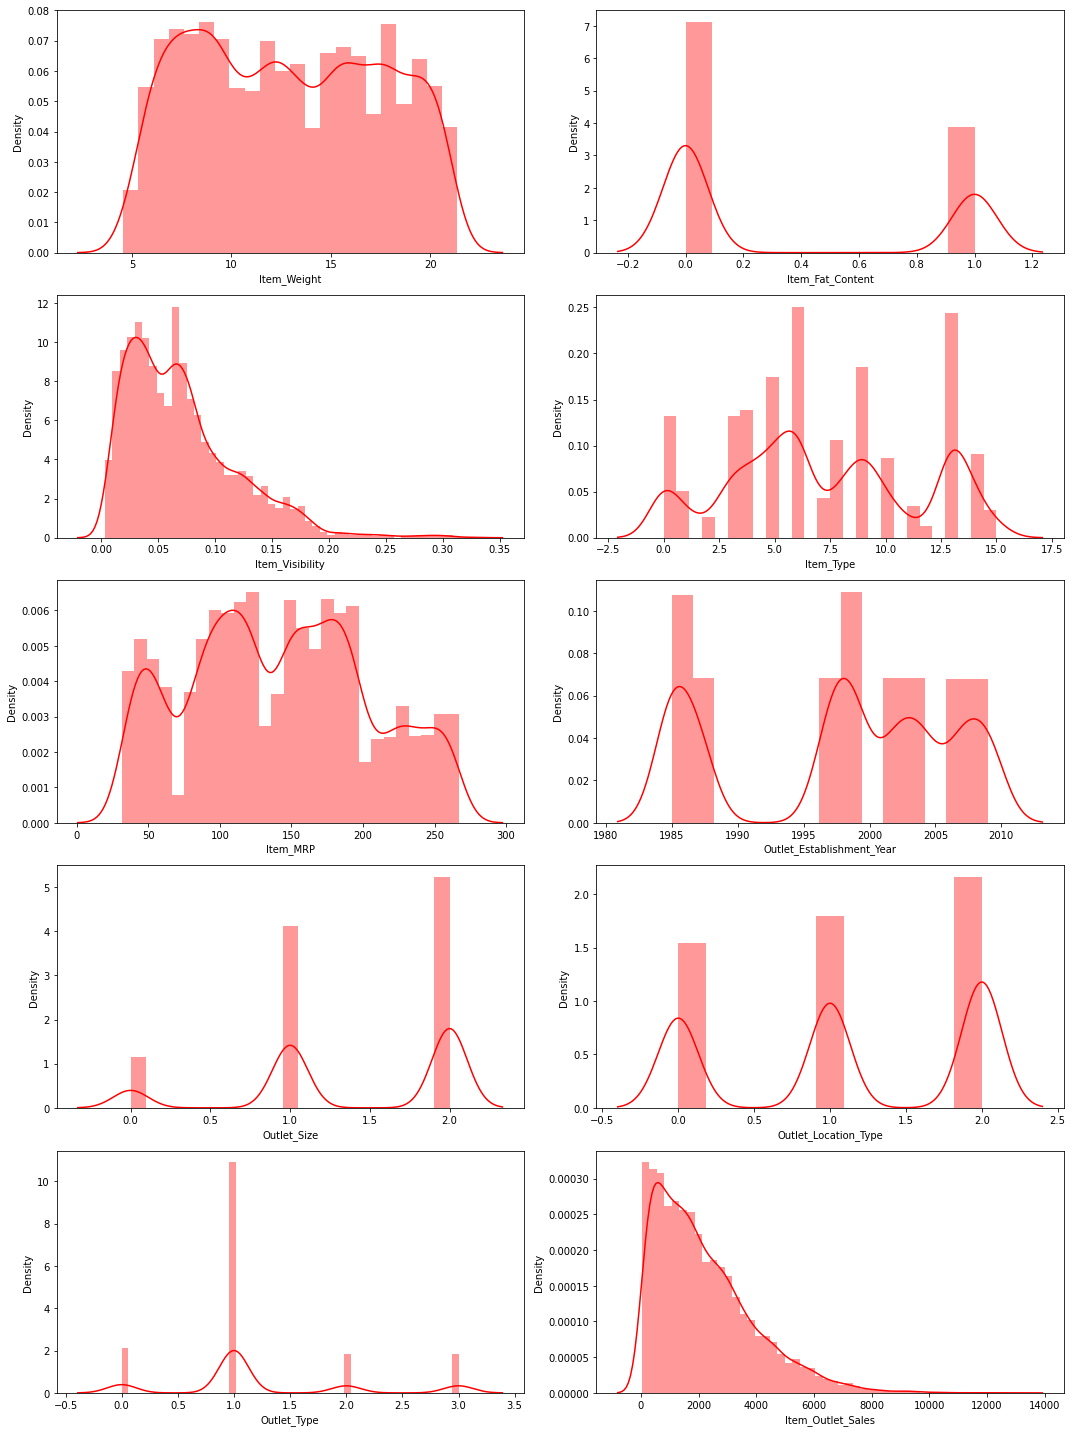

In [ ]:
fig,ax = plt.subplots(5,2,figsize=(15,20))

for col,i in zip(df.columns,ax.flatten()):
  sns.distplot(df[col],ax=i,color='red')
  plt.tight_layout()


In [ ]:
find_skewness = df.skew()
find_skewness

Item_Weight                  0.071014
Item_Fat_Content             0.616705
Item_Visibility              1.269169
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.655208
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [ ]:
skewed_value = []
negative_skewed_value =[]
for i in find_skewness:
  if i> 1:
    skewed_value.append(i)
  elif i <-0.1:
    negative_skewed_value.append(i)
    
skewed_value
negative_skewed_value
value1 = {"POSITIVE SKEWED":skewed_value,"NEGATIVE SKEWED":negative_skewed_value}
print(tabulate(value1,headers=["POSITIVE SKEWED","NEGATIVE SKEWED"]))

  POSITIVE SKEWED    NEGATIVE SKEWED
-----------------  -----------------
          1.26917          -0.396641
          1.17753          -0.655208
                           -0.209093


## CHECKING OUTLIERS

In [ ]:
def outliers(value):
  outliers1 = []
  q1 = df[value].quantile(0.25)
  q3 = df[value].quantile(0.75)
  iqr = q3-q1
  LF = q1 - 1.5*iqr
  UF = q3 + 1.5*iqr
  for i in df[value]:
    if i <LF :
      outliers1.append(i)
    elif i>UF:
      outliers1.append(i)
  fig,ax = plt.subplots(1,2,figsize=(6,4))
  sns.boxplot(df[value],ax=ax[0])
  plt.hist(df[value],color='red',edgecolor='black')
  return print(outliers1)


In [ ]:
df.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.92,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.50,0,0.016760,10,141.617996,1999,1,0,1,2097.270020


[6768.52294921875, 7968.29443359375, 6976.25244140625, 7370.40576171875, 6704.60595703125, 6795.15478515625, 7222.5986328125, 7298.49951171875, 7452.96533203125, 7696.64794921875, 9267.935546875, 7763.22802734375, 6911.00390625, 6687.9609375, 9158.0791015625, 8114.7705078125, 7094.7646484375, 7192.63720703125, 6611.39404296875, 7443.64404296875, 7488.91845703125, 7833.802734375, 7759.89892578125, 6515.51904296875, 7017.5322265625, 7370.40576171875, 9133.4443359375, 9275.92578125, 10236.6748046875, 6622.71240234375, 7152.0234375, 7296.50244140625, 6767.19140625, 6872.3876953125, 7472.2734375, 8132.0810546875, 6897.68798828125, 11445.1015625, 7646.04736328125, 6668.65283203125, 6574.77490234375, 6942.96240234375, 7073.458984375, 7130.7177734375, 6771.18603515625, 7116.0703125, 6524.83984375, 6769.8544921875, 6692.62158203125, 6615.388671875, 7504.23193359375, 7086.109375, 7168.66845703125, 6751.2119140625, 8239.9404296875, 9371.80078125, 8851.1455078125, 7478.265625, 8604.798828125, 7590

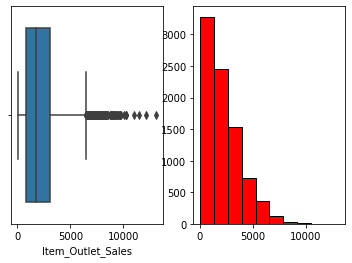

In [ ]:
outliers('Item_Outlet_Sales')

[]


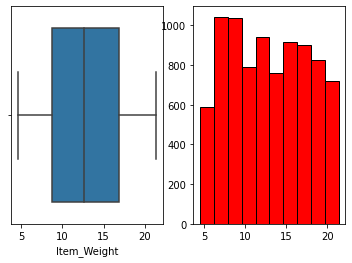

In [ ]:
outliers('Item_Weight')

[0.25539490580558777, 0.19506822526454926, 0.293417751789093, 0.27897408604621887, 0.29186540842056274, 0.1910136640071869, 0.1937725692987442, 0.20469999313354492, 0.26412466168403625, 0.19265006482601166, 0.22899313271045685, 0.2978837192058563, 0.23303981125354767, 0.18832266330718994, 0.2103758007287979, 0.22022560238838196, 0.3283909559249878, 0.20529483258724213, 0.24732103943824768, 0.21413978934288025, 0.18803837895393372, 0.2271895855665207, 0.2234402596950531, 0.2673525810241699, 0.25637540221214294, 0.24410231411457062, 0.18784108757972717, 0.2553482949733734, 0.2248373031616211, 0.2241746336221695, 0.24554263055324554, 0.23643359541893005, 0.27030032873153687, 0.20471303164958954, 0.32111501693725586, 0.24830153584480286, 0.27440518140792847, 0.19100861251354218, 0.20778349041938782, 0.19643867015838623, 0.23535405099391937, 0.24105560779571533, 0.19649089872837067, 0.3037433624267578, 0.23212188482284546, 0.21632300317287445, 0.19842484593391418, 0.21312548220157623, 0.237

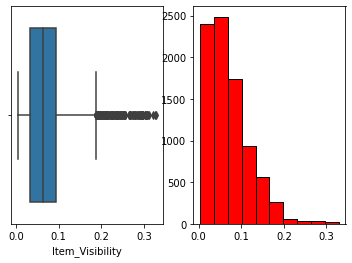

In [ ]:
outliers('Item_Visibility')

[]


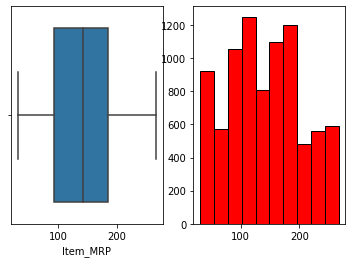

In [ ]:
outliers('Item_MRP')

In [ ]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.92,1,0.019278,14,48.269199,2009,1,2,2,443.422791


In [ ]:
X = df.drop(['Item_Outlet_Sales'],axis=1)


In [ ]:
X1 = df.drop(['Item_Outlet_Sales'],axis=1)

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1
3,19.200001,1,0.074402,6,182.095001,1998,1,2,0
4,8.930000,0,0.064299,9,53.861401,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865000,0,0.056783,13,214.521805,1987,0,2,1
8519,8.380000,1,0.046982,0,108.156998,2002,2,1,1
8520,10.600000,0,0.035186,8,85.122398,2004,2,1,1
8521,7.210000,1,0.145221,13,103.133202,2009,1,2,2


In [ ]:
Y = df['Item_Outlet_Sales']

## SCALING using STANDARDSCALER

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X  = sc.fit_transform(X)
X2 = pd.DataFrame(X,columns=X1.columns)
X2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.293934,-2.055561,1.091569,-0.252658
...,...,...,...,...,...,...,...,...,...
8518,-1.293395,-0.738147,-0.280883,1.371418,1.180783,-1.293934,-2.055561,1.091569,-0.252658
8519,-0.967282,1.354743,-0.481895,-1.716656,-0.527301,0.497909,0.905322,-0.138882,-0.252658
8520,-0.489412,-0.738147,-0.723827,0.183698,-0.897208,0.736822,0.905322,-0.138882,-0.252658
8521,-1.219132,1.354743,1.532915,1.371418,-0.607977,1.334103,-0.575119,1.091569,1.002972


In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

## BUILDING MODELS

## LINEAR_REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
model_lr = LinearRegression()

In [ ]:
params = {
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'normalize':[True,False]
}

In [ ]:
clf_lr = GridSearchCV(model_lr,param_grid=params,cv=2,n_jobs=-1)
clf_lr.fit(X_train,Y_train)


GridSearchCV(cv=2, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [ ]:
print(clf_lr.best_params_)
print(clf_lr.best_score_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.4996137243983867


In [ ]:
lr = LinearRegression(copy_X = True,fit_intercept=True,normalize=True)
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)

0.5014064842931398

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
testing_performance = r2_score(lr_pred,y_test)
testing_performance

0.02655081708445073

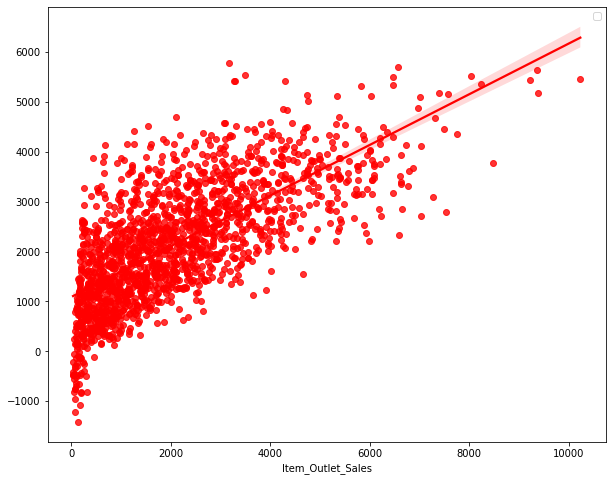

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(y_test,lr_pred,color='red')
plt.legend()
plt.show()

## LInear_Regression Model Performance

In [ ]:
training_lr = lr.score(X_train,Y_train)
model_performance_lr = r2_score(y_test,lr_pred)
mse_lr = mean_squared_error(y_test,lr_pred)
rmse_lr = mean_squared_error(y_test,lr_pred, squared=False)
mae_lr = mean_absolute_error(y_test,lr_pred)
print("mse",mse_lr,'-----',"rmse",rmse_lr,'------',"mae",mae_lr,'-----',"model_performance",model_performance_lr)

mse 1379297.2071504574 ----- rmse 1174.434845851594 ------ mae 888.3197132322038 ----- model_performance 0.49390362651251485


## HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
model = RandomForestRegressor()

In [ ]:
params = {
    "n_estimators":[10,100],
    "max_depth":[5,10,12,15],
    "max_features":["auto", "sqrt", "log2"],
}

In [ ]:
clf = GridSearchCV(model, param_grid=params, cv=2, n_jobs=-1,scoring='r2')
clf.fit(X_train,Y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='r2')

In [ ]:
clf.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
clf.best_score_

0.5944498355785188

In [ ]:
rf = RandomForestRegressor(max_depth=5,max_features='auto',n_estimators=100,oob_score=True)
rf1 = rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.6107129874767852

In [ ]:
rf.feature_importances_

array([3.99454736e-03, 1.24315112e-04, 2.71621023e-03, 5.98610757e-04,
       5.53716211e-01, 5.50693179e-02, 8.31179742e-06, 1.17769779e-04,
       3.83654707e-01])

In [ ]:
rf_pred = rf.predict(x_test)
rf_pred

array([1532.43848827, 2536.73772072, 1410.42261217, ...,  487.58452147,
       1954.37388061, 2541.92101887])

In [ ]:
print(r2_score(y_test,rf_pred))

0.5968427926074171


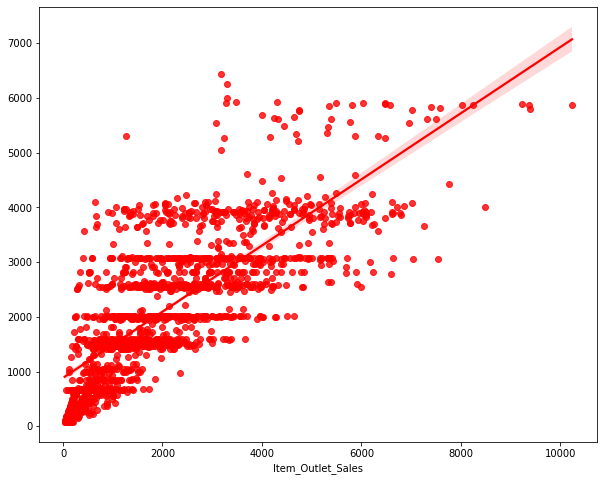

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(y_test,rf_pred,color='red')
plt.show()

In [ ]:
px.scatter(X1,x=y_test,y=rf_pred,color=rf_pred,template='plotly_dark',size=rf_pred)

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.074402,6,182.095001,1998,1,2,0,732.380005
4,8.930000,0,0.064299,9,53.861401,1987,0,2,1,994.705200


## RandomForest Validation

In [ ]:
training_rf = rf.score(X_train,Y_train)
model_performance_rf = r2_score(y_test,rf_pred)
mse_rf = mean_squared_error(y_test,rf_pred)
rmse_rf = mean_squared_error(y_test,rf_pred, squared=False)
mae_rf = mean_absolute_error(y_test,rf_pred)
print("mse",mse_rf,'-----',"rmse",rmse_rf,'------',"mae",mae_rf,'-----',"model_performance",model_performance_rf)

mse 1098750.4343635016 ----- rmse 1048.212971854242 ------ mae 740.3975216859048 ----- model_performance 0.5968427926074171


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb =GradientBoostingRegressor()
params = {
    'loss':['squared_error','absolute_error','huber'],
    "n_estimators":[10,100,1000],
    "criterion":['friedman_mse', 'squared_error']
}

In [ ]:
clf = GridSearchCV(model_gb, param_grid=params, cv=2, n_jobs=-1,scoring='r2')
clf.fit(X_train,Y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [10, 100, 1000]},
             scoring='r2')

In [ ]:
clf.best_params_

{'criterion': 'squared_error', 'loss': 'absolute_error', 'n_estimators': 100}

In [ ]:
clf.best_score_

0.5895206354839173

In [ ]:
model_gb = GradientBoostingRegressor(criterion='friedman_mse', loss='absolute_error', n_estimators= 100)
model_gb.fit(X_train,Y_train)
model_gb.score(X_train,Y_train)

0.6119531642797866

In [ ]:
gb_pred = model_gb.predict(x_test)

In [ ]:
print(r2_score(y_test,gb_pred))

0.5973859709106479


In [ ]:
training_gb = model_gb.score(X_train,Y_train)
model_performance_gb = r2_score(y_test,gb_pred)
mse_gb = mean_squared_error(y_test,gb_pred)
rmse_gb = mean_squared_error(y_test,gb_pred, squared=False)
mae_gb = mean_absolute_error(y_test,gb_pred)
print("mse",mse_gb,'-----',"rmse",rmse_gb,'------',"mae",mae_gb,'-----',"model_performance",model_performance_gb)

mse 1097270.0753728447 ----- rmse 1047.5065992025275 ------ mae 735.3326959799911 ----- model_performance 0.5973859709106479


## SVR (SERVO VECTOR REGRESSOR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_sv = SVR()
params = {
    'kernel':['linear', 'poly', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

In [ ]:
clf_rv =  RandomizedSearchCV(model_sv,params,cv=5,n_jobs=-1)
clf_rv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
clf_rv.best_params_

{'kernel': 'poly', 'gamma': 1}

In [ ]:
clf_rv.best_score_

0.5645546326731741

In [ ]:
model3 = SVR(kernel='poly',gamma=1,C= 10)
model3.fit(X_train,Y_train)
model3.score(X_train,Y_train)

0.6016431929796963

In [ ]:
svr_pred = model3.predict(x_test)
svr_pred

array([1487.87843733, 2477.2788102 , 1429.97048168, ...,  385.90382728,
       1695.26950583, 2401.24648552])

In [ ]:
r2_score(svr_pred,y_test)

0.30920805432760745

## SVR VALIDATION

In [ ]:
training_svr = model3.score(X_train,Y_train)
model_performance_svr = r2_score(y_test,svr_pred)
mse_svr = mean_squared_error(y_test,svr_pred)
rmse_svr = mean_squared_error(y_test,svr_pred, squared=False)
mae_svr = mean_absolute_error(y_test,svr_pred)
print("mse",mse_svr,'-----',"rmse",rmse_svr,'------',"mae",mae_svr,'-----',"model_performance",model_performance_svr)

mse 1111785.906452834 ----- rmse 1054.412588341411 ------ mae 742.7069152875846 ----- model_performance 0.5920597733154853


## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dt = DecisionTreeRegressor()
params1 = {
    
      "splitter":["best", "random"],
      "max_depth":[10,20,30,40]
}

In [ ]:
clf_dt =  RandomizedSearchCV(model_dt,params1,cv=5,n_jobs=-1)
clf_dt.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'splitter': ['best', 'random']})

In [ ]:
print(clf_dt.best_params_)
print(clf_dt.best_score_)

{'splitter': 'random', 'max_depth': 10}
0.5092522529177888


In [ ]:
model_dt = DecisionTreeRegressor(splitter='best',max_features='sqrt',max_depth= 10)
model_dt.fit(X_train,Y_train)
model_dt.score(X_train,Y_train)

0.645541458514751

In [ ]:
dt_pred = model_dt.predict(x_test)

In [ ]:
training_dt = model_dt.score(X_train,Y_train)
model_performance_dt = r2_score(y_test,dt_pred)
mse_dt = mean_squared_error(y_test,dt_pred)
rmse_dt = mean_squared_error(y_test,dt_pred, squared=False)
mae_dt = mean_absolute_error(y_test,dt_pred)
print("mse",mse_dt,'-----',"rmse",rmse_dt,'------',"mae",mae_dt,'-----',"model_performance",model_performance_dt)

mse 1241090.2579134062 ----- rmse 1114.0423052619708 ------ mae 787.8039979790902 ----- model_performance 0.5446149854836133


In [ ]:
value1 = {"MODEL":["LINEAR REGRESSION","RANDOM FOREST","GradientBoost","SVR","DECISION_TREE"],
          "TrainingAccuracy":[training_lr,training_rf,training_gb,training_svr,training_dt],
          "TestingACCURACY":[model_performance_lr,model_performance_rf, model_performance_gb,model_performance_svr,model_performance_dt],
          "MEAN_SQUARED_ERROR":[mse_lr,mse_rf,mse_gb,mse_svr,mse_dt ],
          "ROOT_MEAN_SQUARED_ERROR":[rmse_lr,rmse_rf,rmse_gb,rmse_svr,rmse_dt],
          "MEAN_ABSOLUTE_ERROR":[mae_lr,mae_rf,mae_gb,mae_svr,mae_dt]}

In [ ]:
pd.DataFrame(value1)

,MODEL,TrainingAccuracy,TestingACCURACY,MEAN_SQUARED_ERROR,ROOT_MEAN_SQUARED_ERROR,MEAN_ABSOLUTE_ERROR
0,LINEAR REGRESSION,0.501406,0.493904,1.379297e+06,1174.434846,888.319713
1,RANDOM FOREST,0.610713,0.596843,1.098750e+06,1048.212972,740.397522
2,GradientBoost,0.611994,0.596678,1.099201e+06,1048.427779,735.920614
3,SVR,0.601643,0.592060,1.111786e+06,1054.412588,742.706915
4,DECISION_TREE,0.645541,0.544615,1.241090e+06,1114.042305,787.803998


## FEATURES IMPORTANCE

In [ ]:
df5 = pd.DataFrame({'column_name':X2.columns,'column_importance':rf.feature_importances_})
df5.sort_values(by='column_importance',ascending=False)

,column_name,column_importance
4,Item_MRP,0.553716
8,Outlet_Type,0.383655
5,Outlet_Establishment_Year,0.055069
0,Item_Weight,0.003995
2,Item_Visibility,0.002716
3,Item_Type,0.000599
1,Item_Fat_Content,0.000124
7,Outlet_Location_Type,0.000118
6,Outlet_Size,0.000008


In [ ]:
df0 = pd.DataFrame({"PREDICTED_VALUE":rf_pred,"ACTUAL_VALUE":y_test})  
df0

,PREDICTED_VALUE,ACTUAL_VALUE
8179,1532.438488,904.822205
8355,2536.737721,2795.694092
3411,1410.422612,1947.464966
7089,670.167482,872.863770
6954,2547.736054,2450.144043
...,...,...
1317,2552.907043,1721.093018
4996,2547.736054,914.809204
531,487.584521,370.184814
3891,1954.373881,1358.232056


In [ ]:
x=df["Item_MRP"]
y =df["Item_Outlet_Sales"]
z= df["Item_Weight"]
trace1 = go.Scatter3d(x=x,y=y,z=z,mode="markers",
                      marker=dict(
                          size=8,
                          color=z,
                          colorscale='viridis',
                          opacity=1.0
                      ))

In [ ]:
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,                                  # left Margin
        r=0,                                  # Right Margin
        b=0,                                  # bottom Margin
        t=0                                   # top margin
    )
)
fig = go.Figure(data=data,layout=layout)
fig

In [ ]:
df_submision = pd.DataFrame({"Actual":y_test,"Predicted":rf_pred})
df_submision

,Actual,Predicted
8179,904.822205,1532.438488
8355,2795.694092,2536.737721
3411,1947.464966,1410.422612
7089,872.863770,670.167482
6954,2450.144043,2547.736054
...,...,...
1317,1721.093018,2552.907043
4996,914.809204,2547.736054
531,370.184814,487.584521
3891,1358.232056,1954.373881


In [ ]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_submision.to_csv("Mini_Project2.csv",index=False)

In [ ]:
X2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,-0.738147,-1.116357,-0.766479,1.747454,0.139541,-0.575119,-1.369334,-0.252658
1,-1.496813,1.354743,-1.050092,1.608963,-1.489023,1.334103,-0.575119,1.091569,1.002972
2,0.995858,-0.738147,-1.101738,0.658786,0.010040,0.139541,-0.575119,-1.369334,-0.252658
3,1.361794,1.354743,0.080475,-0.291391,0.660050,0.020085,-0.575119,1.091569,-1.508289
4,-0.848890,-0.738147,-0.126740,0.421242,-1.399220,-1.293934,-2.055561,1.091569,-0.252658


In [ ]:
x_test5 = pd.DataFrame(x_test,columns=X2.columns)
x_test5

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.403309,-0.738147,-0.314119,0.183698,-0.652900,1.334103,-0.575119,1.091569,1.002972
1,1.103486,-0.738147,-0.646050,1.371418,0.122834,-1.293934,-2.055561,1.091569,-0.252658
2,-1.109351,1.354743,0.087223,-1.479112,-1.018030,-0.099372,0.905322,-1.369334,-0.252658
3,1.684679,-0.738147,-0.439804,-0.291391,-1.622609,1.095190,0.905322,-0.138882,-0.252658
4,-1.145944,-0.738147,-0.887110,-1.004023,0.191761,0.497909,0.905322,-0.138882,-0.252658
...,...,...,...,...,...,...,...,...,...
1700,0.834415,-0.738147,0.708399,1.371418,0.229162,0.139541,-0.575119,-1.369334,-0.252658
1701,-0.937146,-0.738147,-0.890505,1.608963,0.198733,-0.099372,0.905322,-1.369334,-0.252658
1702,0.586871,-0.738147,0.845136,0.896330,0.703366,0.020085,-0.575119,1.091569,-1.508289
1703,0.909755,-0.738147,0.080475,0.421242,-0.422454,1.334103,-0.575119,1.091569,1.002972
